# Coding Buchla with Python

Learning about how to use Python for sound modulation. Taught by Tiago Rezende on 30.07.2023.

## First things first: install & import all necessary stuff

In [1]:
!pip install scipy --quiet
!brew install portaudio
!pip install pyaudio --quiet


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
==> Downloading https://formulae.brew.sh/api/formula.jws.json
######################################################################### 100.0%
==> Downloading https://formulae.brew.sh/api/cask.jws.json
######################################################################### 100.0%
To reinstall 19.7.0, run:
  brew reinstall portaudio

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from IPython.display import Audio
from math import sin, pi, cos, fmod
import pyaudio 
import struct

In [3]:
p = pyaudio.PyAudio()

## Let's open an ongoing stream where we will hear the sound output

In [4]:
stream = p.open(channels = 1, rate = 44100, output = True, format = pyaudio.paFloat32)

## Create the first sound

In [5]:
for x in range(0, 44100):
    stream.write(struct.pack('f', sin(440.0*pi*x/44100.0)))

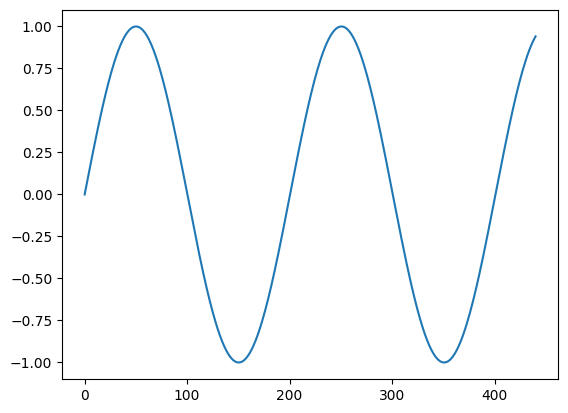

In [6]:
plt.plot([sin(440.0*pi*x/44100.0) for x in range(0, 441)])

# Modulator 1: SIN wave


In [8]:
def wavefolder(wave, folds):
    return sin(wave * pi * 2.0 * folds)

### This is how it sounds

In [9]:
for x in range(0, 44100):
    stream.write(struct.pack('f',  wavefolder(sin(440.0*pi*x/44100.0), 5599999999999996)))

### This is how it looks

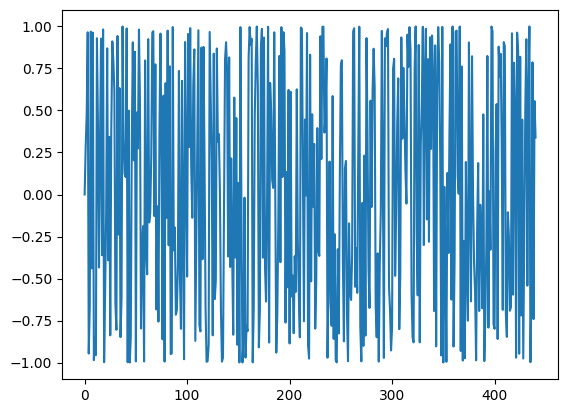

In [10]:
plt.plot([wavefolder(sin(440.0*pi*x/44100.0), 5599999999999996) for x in range(0, 441)])

### Play with it!

In [12]:
for x in range(0, 44100):
    stream.write(struct.pack('f',  wavefolder(sin(440.0*pi*x/44100.0), 5)))

# Modulator 2: COS wave

In [15]:
def wavefolder2(wave, folds):
    return cos(wave * pi * 2.0 * folds)

### Play with it!

In [16]:
for x in range(0, 44100):
    stream.write(struct.pack('f',  wavefolder2(sin(440.0*pi*x/44100.0), 99)))

In [17]:
for x in range(0, 44100):
    stream.write(struct.pack('f',  wavefolder(sin(440.0*pi*x/44100.0), 99)))

# Frequency modulation 1 (SIN wave)

In [18]:
def fm(carrier_freq, x, modulator, modulation):
    return sin((carrier_freq * pi * 2.0 * x) / 44100.0 + modulator * modulation)

## Play with it!

In [20]:
for x in range(0, 44100):
    stream.write(struct.pack('f', fm(440.0, x, (cos(440.0*pi*x/44100.0)), 1)))

In [21]:
for x in range(0, 44100):
    stream.write(struct.pack('f', fm(cos(40.0*pi*x/99900.0), x, (cos(440.0*pi*x/9999100.0)), cos(440.0*pi*x/44100.0))))

In [22]:
for x in range(0, 44100):
    stream.write(struct.pack('f', fm(cos(40.0*pi*x/99900.0), x, (cos(440.0*pi*x/9999100.0)), cos(440.0*pi*x/44100.0))))

In [71]:
for x in range(0, 44100):
    stream.write(struct.pack('f', 
                             fm(228.0, x,
                                fm(18.0, x,
                                   fm(5.0, x,
                                      fm(1.0, x,
                                         fm(8.0, x, 0,0), 1), 7), 5), 5)))

In [72]:
for x in range(0, 44100):
    stream.write(struct.pack('f', 
                             fm(2.0, x,
                             fm(228.0, x,
                                fm(18.0, x,
                                   fm(5.0, x,
                                      fm(1.0, x,
                                         fm(8.0, x, 0,0), 1), 7), 5), 5), 7)))

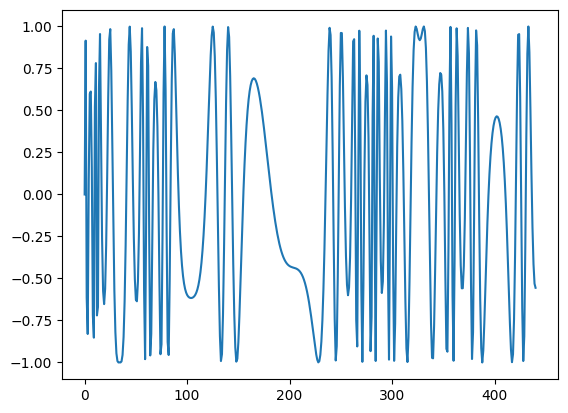

In [25]:
plt.plot([fm(2.0, x, fm(228.0, x, fm(18.0, x,
                                   fm(5.0, x,
                                      fm(1.0, x,
                                         fm(8.0, x, 0,0), 1), 7), 5), 5), 7) for x in range(0, 441)])

In [70]:
for x in range(0, 44100):
    stream.write(struct.pack('f', 
                             fm(2.0, x,
                             fm(8.0, x,
                                fm(8.0, x,
                                   fm(5.0, x,
                                      fm(1.0, x,
                                         fm(8.0, x, 0,0), 1), 79), 1), 1), 1)))

In [69]:
for x in range(0, 44100):
    stream.write(struct.pack('f', 
                             fm(1.0, x,
                             fm(2.0, x,
                                fm(3.0, x,
                                   fm(4.0, x,
                                      fm(5.0, x,
                                         fm(6.0, x, 7, 6), 5), 4), 4), 3), 2)))

# Create an envelope

In [28]:
def ar_env(a, r, t):
    if a <= 0:
        # to avoid the deivide by 0 in attack
        return max(0.0, (1.0 - t) / r)
    elif t <= a:
        # the attack phase
        return t / a
    elif r <= 0:
        # to avoid deivide by 0 in release phase
        return 0.0
    return max(0.0, (1.0 - (t - a) / r))

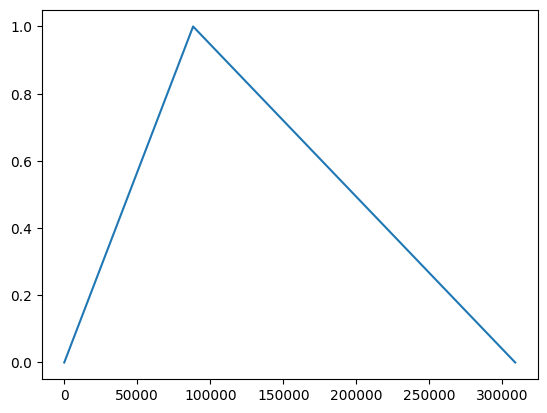

In [29]:
plt.plot([ar_env(2, 5, t/44100.0) for t in range(0, 44100 * 7)])

## Play with it!

In [30]:
for x in range(0, 44100*12):
    stream.write(struct.pack('f', 
                             fm(1.0, x,
                             fm(2.0, x,
                                fm(3.0, x,
                                   fm(4.0, x,
                                      fm(5.0, x,
                                         fm(6.0, x, 7, 6), 5), ar_env(1, 33, x/44100)*88), ar_env(1, 33, x/44100)*4), 
                                ar_env(1, 9, x/44100)*7), 
                                ar_env(1, 9, x/44100.0)*3)))

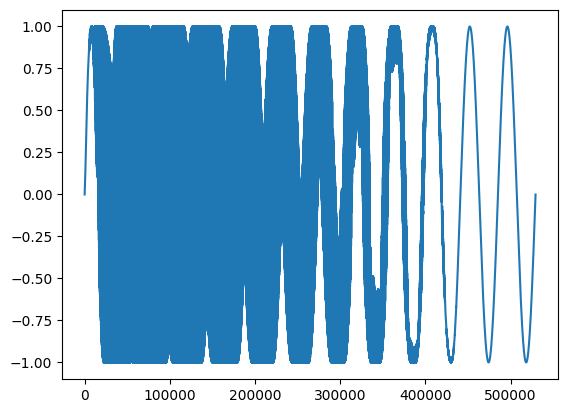

In [31]:
plt.plot([fm(1.0, x,
                             fm(2.0, x,
                                fm(3.0, x,
                                   fm(4.0, x,
                                      fm(5.0, x,
                                         fm(6.0, x, 7, 6), 5), ar_env(1, 33, x/44100)*88), ar_env(1, 33, x/44100)*4), 
                                ar_env(1, 9, x/44100)*7), 
                                ar_env(1, 9, x/44100.0)*3) for x in range(0, 44100*12)])

# Modulator 3: SAW wave

In [32]:
def saw(freq, t):
    return fmod(freq * t / 44100, 1.0)

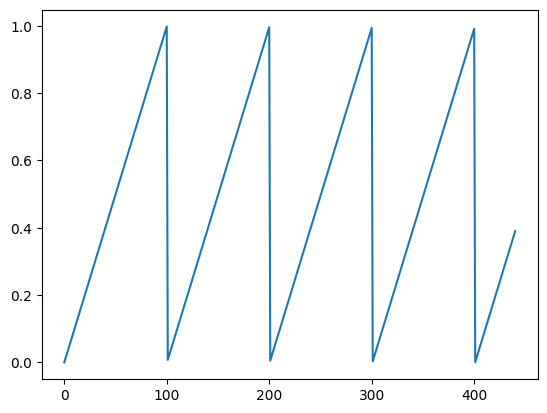

In [33]:
plt.plot([saw(440.0, t) for t in range(0, 441)])

## Play with it!

In [34]:
for t in range(0, 44100):
    stream.write(struct.pack('f', saw(160, t)))

### Add other stuff: FMs are modulating the SAW >

In [35]:
for t in range(0, 44100*5):
    stream.write(struct.pack('f', fm(0.5, t, 8, 8) * fm(0.1, t, 1, 1) * saw(260, t)))

### Add other stuff: SAW modulates the FMs >

In [73]:
for t in range(0, 44100*5):
    stream.write(struct.pack('f', saw(0.5, t) * fm(108, t, 9, 8) * fm(507, t, 18, 18)))

In [74]:
for t in range(0, 44100*5):
    stream.write(struct.pack('f', saw(0.3, t) * fm(800, t, 66, 44) * fm(607, t, 50, 33)))

### Multiply the frequency of the SAW by the envelope

In [75]:
for t in range(0, 44100*9):
    stream.write(struct.pack('f', saw(11 * ar_env(4, 6, t/44100.0), t) 
                             * fm(108 * ar_env(2, 5, t/44100.0), t, 9, 8) 
                             * fm(507 * ar_env(2, 5, t/44100.0), t, 18, 18)))

In [79]:
for t in range(0, 44100*13):
    stream.write(struct.pack('f', saw(11 * ar_env(4, 6, t/44100.0), t) 
                             * fm(108 * ar_env(9, 2, t/44100.0), t, 9, 8) 
                             * fm(507 * ar_env(9, 9, t/44100.0), t, 18, 18)))

In [77]:
for t in range(0, 44100*13):
    stream.write(struct.pack('f', saw(11 * ar_env(3, 8, t/44100.0), t) 
                             * fm(108 * ar_env(4, 8, t/44100.0), t, 9, 8) 
                             * fm(507 * ar_env(9, 9, t/44100.0), t, 18, 18)))

# Create an envelope (same as before but time is pre-calculated)

In [42]:
def ar_env2(a, r, t):
    t = t/44100.0
    if a <= 0:
        # to avoid the deivide by 0 in attack
        return max(0.0, (1.0 - t) / r)
    elif t <= a:
        # the attack phase
        return t / a
    elif r <= 0:
        # to avoid deivide by 0 in release phase
        return 0.0
    return max(0.0, (1.0 - (t - a) / r))

## Play with it!

In [43]:
for t in range(0, 44100*9):
    stream.write(struct.pack('f', saw(151 * ar_env2(3, 18, t), t) 
                             * fm(5554 * ar_env2(4, 18, t), t, 1, 8) 
                             * fm(644 * ar_env2(9, 19, t), t, 4, 8)))

# Modulator 4: SQUARE wave

In [44]:
def square(freq, t):
    return 1.0 if fmod(freq*t/44100.0, 1.0) > 0.5 else 0.0

## Play with it!

In [45]:
for t in range(0, 44100*9):
    stream.write(struct.pack('f', square(51 * ar_env2(3, 18, t), t) 
                             * fm(5554 * ar_env2(4, 18, t), t, 1, 8) 
                             * fm(644 * ar_env2(9, 19, t), t, 4, 8)))

In [46]:
for t in range(0, 44100*9):
    stream.write(struct.pack('f', saw(51 * ar_env2(3, 18, t), t) 
                             * fm(5554 * ar_env2(4, 18, t), t, 1, 8) 
                             * fm(644 * ar_env2(9, 19, t), t, 4, 8)))

In [47]:
for t in range(0, 44100*9):
    stream.write(struct.pack('f', square(395 * ar_env2(344, 39, t), t) 
                             * fm(8904 * ar_env2(49, 18, t), t, 13, 83) 
                             * fm(5064 * ar_env2(49, 83, t), t, 34, 38)))

In [48]:
for t in range(0, 44100*9):
    stream.write(struct.pack('f', square(395 * ar_env2(4, 9, t), t) 
                             * fm(8904 * ar_env2(1, 1, t), t, 13, 83) 
                             * fm(5064 * ar_env2(1, 3, t), t, 34, 38) * saw(591 * ar_env2(3, 18, t), t)))

# Generate NOISE <3 <3 <3

Next step! LFSR = Linear Feedback Shift Register 
https://en.wikipedia.org/wiki/Linear-feedback_shift_register
> will allow us to generate some bautiful noise!


In [49]:
class LFSR:
    def __init__(self, taps = [1, 3, 12]):
        self.state = 1938
        self.taps = taps
        self.feedback = 16
    def tick(self):
        tapped = 1
        for t in self.taps:
            tapped = tapped ^(self.state >> t)
        self.state = (self.state >> 1) + ((tapped & 1) << self.feedback)
        return self.state
    def sample(self):
        return self.tick() & 1
            

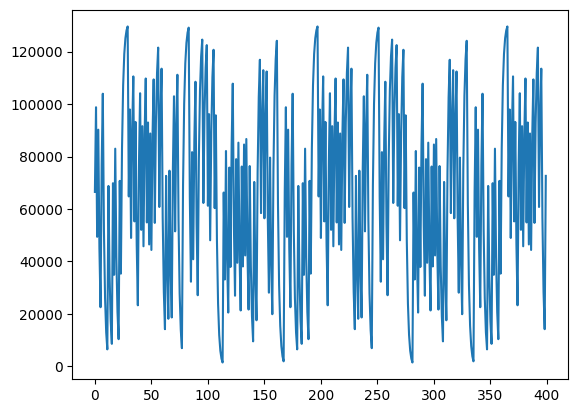

In [50]:
lfsr = LFSR(taps=[1, 3, 7])
plt.plot([(lfsr.tick()) for x in range(0, 400)])

#(lambda x: (x, (x & 1) * 120000))

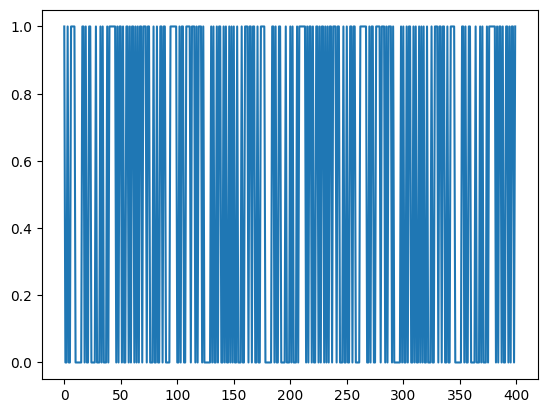

In [51]:
lfsr = LFSR(taps=[1, 3, 7])
plt.plot([(lfsr.sample()) for x in range(0, 400)])

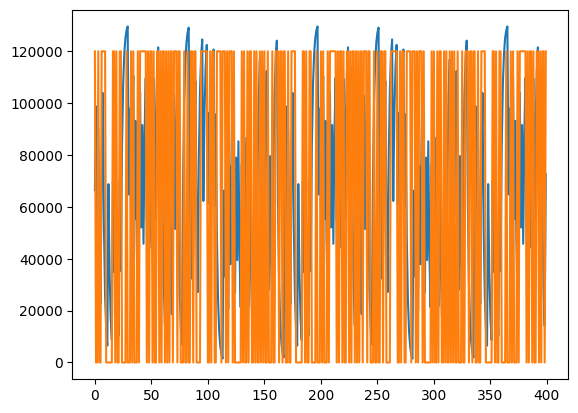

In [52]:
lfsr = LFSR(taps=[1, 3, 7])
plt.plot([(lambda x: (x, (x & 1) * 120000))(lfsr.tick()) for x in range(0, 400)])

#(lambda x: (x, (x & 1) * 120000))

## Play with it!!!

In [64]:
lfsr = LFSR(taps=[1, 2, 4])
for t in range(0, 44100):
    stream.write(struct.pack('f', lfsr.sample()))

In [65]:
lfsr = LFSR(taps=[1555, 154, 153, 5])
for t in range(0, 44100):
    lfsr.taps[3] = int(ar_env2(0.5, 5.0, t) * 8 + 3)
    stream.write(struct.pack('f', lfsr.sample()))

In [68]:
lfsr = LFSR(taps=[11, 14, 12, 13])
for t in range(0, 44100*10):
    lfsr.taps[3] = int(ar_env2(0.5, 5.0, t) * 8 + 3)
    stream.write(struct.pack('f', lfsr.sample()))

# Another oscillator PULSE

In [56]:
def pulse(freq, t, width):
    return 1.0 if fmod(freq*t/44100.0, 1.0) > (1.0 - width) else 0.0

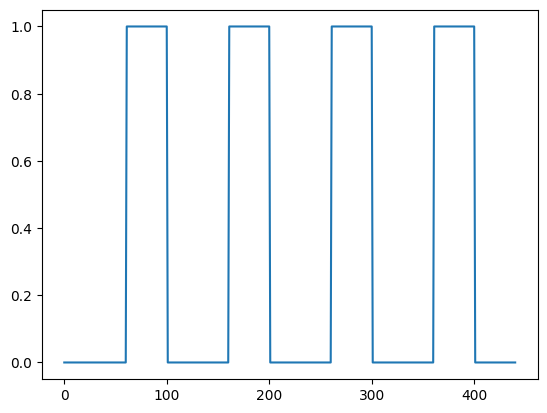

In [57]:
plt.plot([pulse(440, t, 0.4) for t in range(0,441)])

## Play with it

In [58]:
for t in range(0, 44100):
    stream.write(struct.pack('f', pulse(160, t, 0.3)))

In [59]:
for t in range(0, 44100*5):
    lfsr.taps[3] = int(ar_env2(0.5, 3.0, t) * 2 + 1)
    stream.write(struct.pack('f', lfsr.sample() * lfsr.sample() * lfsr.sample() * lfsr.sample() * lfsr.sample() - pulse(3*ar_env(2, 3, t/44100.0), t, 0.3* ar_env(3, 6, t/44100.0))))

In [60]:
for t in range(0, 44100*10):
    lfsr.taps[3] = int(ar_env2(0.2, 8.0, t) * 8 + 7)
    stream.write(struct.pack('f', lfsr.sample() * lfsr.sample() * lfsr.sample() * lfsr.sample() * lfsr.sample() - pulse(3*ar_env(2, 3, t/44100.0), t, 0.3* ar_env(3, 6, t/44100.0))))

In [61]:
for t in range(0, 44100*10):
    lfsr.taps[3] = int(ar_env2(0.2, 8.0, t) * 8 + 7)
    stream.write(struct.pack('f', lfsr.sample()
                             * lfsr.sample() * lfsr.sample() - 
                             pulse(3*ar_env(222, 32, t/44100.0), t, 0.3 
                                   * ar_env(12, 64, t/44100.0))))

In [63]:
for t in range(0, 44100*15):
    stream.write(struct.pack('f', 
                             pulse(16450, t, 0.8 * lfsr.sample()) * pulse(33990 * ar_env(0.3, 6, t/44100.0), t, 0.5)))